<center>    <h1>KECERDASAN BUATAN</h1>   </center>

<h3>Anggota Kelompok :<h3>
    <ol>
<li>Lalu Ramdoni Hidayat (F1D021102) LEAD</li>
<li>Shafa Nindira Cahyani (F1D021067)</li>
<li>Baiq Kaimya Al Saadah Al Ghazali (F1D021082)</li>
<li>Elvita Wilia Kartika (F1D021086)</li>
<li>Faza Alliya Audistry Putri Ronce (F1D021090)</li>
</ol>

<div style="display:fill;
           border-radius:5px;
           font-family:montserrat;
           letter-spacing:0.5px;
           background-color:skyblue;">

<p style="padding: 10px;
              color:black;
              text-align:center;
              font-size:200%;
              font-weight:800;">
              ~Chronic Kidney Disease~          
</p>
</div>

<div style="display:fill;
           border-radius:5px;
           font-family:montserrat;
           letter-spacing:0.5px;
           background-color:skyblue;">

<p style="padding: 10px;
              color:black;
              text-align:center;
              font-size:200%;
              font-weight:800;">
              Klasifikasi Ginjal Kronik Menggunakan Metode Naive Bayes             
</p>
</div>

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:montserrat;
           letter-spacing:0.5px;
            text-align:center;
            padding: 1px;">

<p style="padding: 6px;
            color:white;
            text-align:center;
            font-size:150%;">
            IMPLEMENTASI NAIVE BAYES DALAM KLASIFIKASI PENYAKIT GINJAL KRONIK !
</p>
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dalam kode ini, kita mengimpor beberapa pustaka yang diperlukan untuk analisis data dan pembuatan model. Pertama, kita menggunakan Pandas untuk manipulasi dan analisis data, kemudian scikit-learn untuk pembagian data menjadi set pelatihan dan pengujian, serta untuk membangun model Naïve Bayes dengan metode Gaussian. Selanjutnya, kita mengimpor fungsi untuk mengukur akurasi model dan menggunakan NumPy untuk operasi numerik. Terakhir, Matplotlib dan Seaborn digunakan untuk visualisasi data.

Pertama-tama, data dapat dimuat menggunakan Pandas dengan mengimpor dataset yang diperlukan. Setelah itu, dataset dibagi menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split dari scikit-learn. Hal ini diperlukan untuk menguji kinerja model pada data yang tidak pernah dilihat sebelumnya.

Selanjutnya, model Naïve Bayes dengan metode Gaussian diterapkan dan dilatih menggunakan set pelatihan. Setelah model dilatih, kita dapat menggunakan set pengujian untuk membuat prediksi, dan akurasi model diukur menggunakan fungsi accuracy_score dari scikit-learn. NumPy digunakan untuk operasi numerik, yang mungkin diperlukan selama analisis.

Terakhir, Matplotlib dan Seaborn digunakan untuk visualisasi data. Visualisasi dapat mencakup plot distribusi fitur, heatmap korelasi, atau grafik lainnya untuk membantu pemahaman karakteristik data. Penggunaan Matplotlib dan Seaborn dapat memperkaya analisis data dan memberikan wawasan yang lebih mendalam terhadap struktur dan pola dalam dataset.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:montserrat;
           letter-spacing:0.5px;
            text-align:center;
            padding: 1px;">

<p style="padding: 6px;
            color:white;
            text-align:center;
            font-size:150%;">            
            Preprocessing Data
</p>
</div>

In [2]:
# Load Chronic Kidney Disease dataset
kidney_data = pd.read_csv("penyakit_ginjal_kronik.csv") #data tentang penyakit ginjal kronik
kidney_data.head()

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Kode di atas bertujuan untuk memuat dataset mengenai penyakit ginjal kronis ke dalam program menggunakan library Pandas pada bahasa pemrograman Python. Pertama, kita membaca file CSV yang berisi data penyakit ginjal kronis menggunakan fungsi pd.read_csv("penyakit_ginjal_kronik.csv"). Pada baris ini, pd merujuk pada Pandas, library yang digunakan untuk manipulasi dan analisis data. Kemudian, kita menyertakan komentar (#) untuk memberikan penjelasan tambahan bahwa kita sedang memuat data tentang penyakit ginjal kronis dari file CSV yang bernama "penyakit_ginjal_kronik.csv". Setelah dataset dimuat, kita menggunakan metode .head() untuk menampilkan lima baris pertama dari dataset tersebut. Ini membantu kita untuk melihat struktur dan konten awal dari dataset penyakit ginjal kronis.

In [3]:
# Explore the dataset
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               400 non-null    int64  
 1   umur             391 non-null    float64
 2   tekanandarah     388 non-null    float64
 3   gravitas         353 non-null    float64
 4   albumin          354 non-null    float64
 5   sugar            351 non-null    float64
 6   seldarahmerah    248 non-null    object 
 7   pussel           335 non-null    object 
 8   puscell          396 non-null    object 
 9   bakteri          396 non-null    object 
 10  gds              356 non-null    float64
 11  ureum            381 non-null    float64
 12  kreatinin        383 non-null    float64
 13  natrium          313 non-null    float64
 14  kalium           312 non-null    float64
 15  hemoglobin       348 non-null    float64
 16  MCV              330 non-null    object 
 17  seldarahputih   

Fungsi info() digunakan untuk memberikan informasi terperinci tentang struktur dataset, termasuk jumlah entri (baris), jumlah kolom, tipe data masing-masing kolom, dan jumlah nilai non-null (tidak kosong) di setiap kolom. 

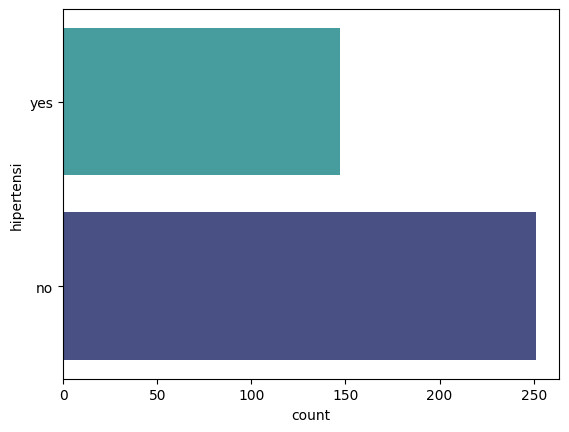

In [4]:
# Visualizations
sns.countplot(y="hipertensi", data=kidney_data, palette="mako_r")
plt.show()

Fungsi sns.countplot(y="hipertensi", data=kidney_data, palette="mako_r") menggunakan library Seaborn (sns) untuk membuat count plot dengan sumbu y menunjukkan kategori "hipertensi". Parameter data diisi dengan kidney_data, yang merupakan dataset yang berisi informasi tentang penyakit ginjal kronis.

Palet warna yang digunakan diatur dengan parameter palette yang disetel ke "mako_r". Pengaturan warna ini dapat disesuaikan dengan preferensi visual atau keperluan tertentu. Setelah semua konfigurasi selesai, plot ditampilkan menggunakan plt.show().

Dengan visualisasi ini, kita dapat dengan cepat melihat distribusi kategori "hipertensi" dalam dataset

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


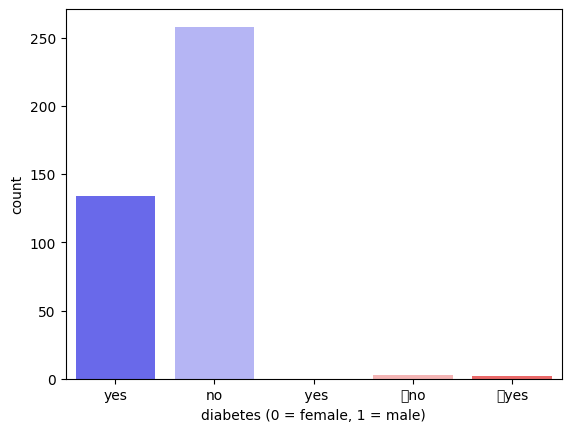

In [5]:
sns.countplot(x='diabetes', data=kidney_data, palette="bwr")
plt.xlabel("diabetes (0 = female, 1 = male)")
plt.show()

sns.countplot(x='diabetes', data=kidney_data, palette="bwr"):

sns.countplot adalah fungsi dari library Seaborn yang digunakan untuk membuat countplot, yaitu sebuah plot batang yang menunjukkan jumlah frekuensi masing-masing kategori pada variabel tertentu.
x='diabetes' menunjukkan bahwa sumbu x pada countplot akan mewakili variabel 'diabetes'.
data=kidney_data menyatakan bahwa data yang digunakan untuk plot berasal dari DataFrame kidney_data.
palette="bwr" menentukan skema warna yang digunakan pada plot. Dalam hal ini, menggunakan skema warna "bwr" yang merepresentasikan dua kategori dengan warna biru (blue) dan merah (red).
plt.xlabel("diabetes (0 = female, 1 = male)"):

plt.xlabel digunakan untuk memberikan label pada sumbu x, yang dalam hal ini berisi keterangan tentang variabel 'diabetes'. Label tersebut adalah "diabetes (0 = female, 1 = male)".
plt.show():

plt.show() digunakan untuk menampilkan plot.
Dengan code ini, kita dapat dengan cepat melihat distribusi variabel 'diabetes' dalam dataset, dan seberapa banyak kasus diabetes pada kelompok gender yang dinyatakan dengan angka 0 (female) dan 1 (male).

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


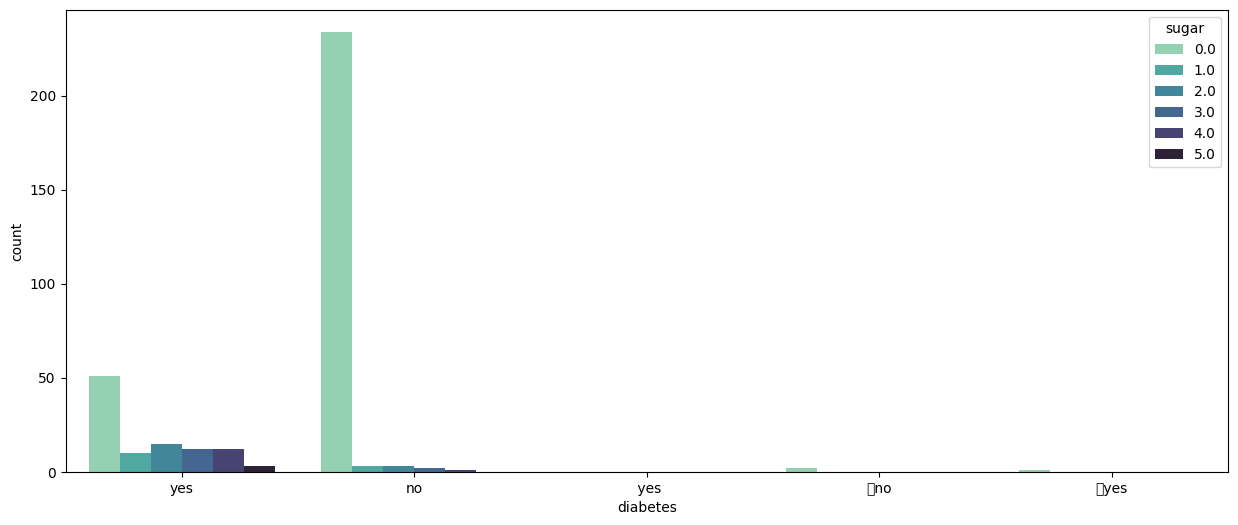

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='diabetes', data=kidney_data, hue='sugar', palette='mako_r')
plt.show()


Hasilnya adalah visualisasi yang memberikan informasi tentang sebaran jumlah pasien dengan diabetes berdasarkan status gula dalam darah, dengan warna yang membedakan kategori sugar.

In [7]:
# Define independent and dependent variables
X_kidney = kidney_data.drop(["hipertensi"], axis=1)
y_kidney = kidney_data["hipertensi"]

Dalam blok kode di atas, terdapat dua langkah utama yang dilakukan untuk mempersiapkan data untuk analisis lebih lanjut. Pertama, kita mendefinisikan variabel independen (X_kidney) dan variabel dependen (y_kidney). Variabel independen adalah himpunan fitur atau atribut yang akan digunakan sebagai input untuk model, sedangkan variabel dependen adalah target atau label yang ingin diprediksi oleh model.
Pada bagian pertama, variabel independen (X_kidney) didefinisikan dengan menggunakan fungsi drop pada dataset kidney_data. Atribut "hipertensi" dihapus dari dataset menggunakan argumen axis=1, yang mengindikasikan bahwa kita menghapus kolom, bukan baris. Dengan demikian, X_kidney berisi semua fitur kecuali variabel target "hipertensi".

Pada bagian kedua, variabel dependen (y_kidney) didefinisikan sebagai kolom "hipertensi" dari dataset kidney_data. Ini menciptakan satu set label yang sesuai dengan data yang akan kita gunakan untuk melatih dan menguji model klasifikasi. Dengan langkah-langkah ini, kita telah memisahkan input (fitur) dan output (label) dengan benar untuk analisis selanjutnya.

In [16]:
# Split the data
x_train_kidney, x_test_kidney, y_train_kidney, y_test_kidney = train_test_split(X_kidney, y_kidney, test_size=0.2, random_state=123)

train_test_split: Fungsi ini berasal dari library scikit-learn dan digunakan untuk membagi dataset menjadi dua bagian, yakni data pelatihan dan data uji.
X_kidney dan y_kidney: Merupakan variabel yang menyimpan fitur (X) dan label (y) dari dataset penyakit ginjal.
test_size=0.2: Parameter ini menentukan proporsi data yang akan digunakan sebagai data uji. Dalam contoh ini, data uji akan menyusun 20% dari keseluruhan dataset.
random_state=123: Parameter ini memastikan bahwa hasil pembagian data dapat direproduksi dengan nilai seed tertentu (123 dalam hal ini). Ini bermanfaat ketika Anda ingin hasil yang konsisten setiap kali menjalankan kode yang melibatkan pembagian data acak.

In [17]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
# Menentukan kolom numerik dan kategorikal
numeric_features = x_train_kidney.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train_kidney.select_dtypes(include=['object']).columns

Dalam kode tersebut, kita memiliki dua baris yang bertujuan untuk memisahkan kolom-kolom dalam dataset menjadi dua kategori: numerik dan kategorikal.

Pertama-tama, kita mencari kolom-kolom yang memiliki tipe data numerik, seperti bilangan bulat (int64) dan desimal (float64). Ini dilakukan dengan menggunakan metode select_dtypes pada dataframe x_train_kidney dan menyertakan tipe data yang ingin dipilih, yaitu 'float64' dan 'int64'. Hasilnya disimpan dalam variabel numeric_features.

Kemudian, kita melakukan hal yang serupa untuk kolom-kolom kategorikal. Di sini, kita memilih kolom-kolom dengan tipe data 'object' (misalnya, string atau kategori). Proses ini juga menggunakan metode select_dtypes dan hasilnya disimpan dalam variabel categorical_features.

Dengan memisahkan kolom-kolom berdasarkan tipe data ini, kita dapat dengan mudah melakukan pemrosesan yang sesuai tergantung pada karakteristik masing-masing jenis kolom, seperti normalisasi pada data numerik atau encoding pada data kategorikal.

In [27]:
# Menggunakan ColumnTransformer untuk memproses kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='mean'), numeric_features),
        ('categorical', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

Code tersebut menggambarkan penggunaan ColumnTransformer dalam pemrosesan data pada kolom numerik dan kategorikal. ColumnTransformer digunakan untuk menerapkan transformer (transformasi data) khusus pada subset kolom tertentu dalam suatu dataset.
Dengan menggunakan ColumnTransformer ini, pemrosesan data dapat dijalankan pada kolom-kolom numerik dan kategorikal secara terpisah, dengan menerapkan imputasi yang sesuai untuk setiap jenis kolom. Hal ini merupakan langkah penting dalam pra-pemrosesan data sebelum melakukan pemodelan


In [28]:
# Menggantikan nilai NaN dalam data latih
x_train_kidney_imputed = preprocessor.fit_transform(x_train_kidney)
x_test_kidney_imputed = preprocessor.transform(x_test_kidney)

Dengan mengatasi nilai-nilai NaN, kita memastikan bahwa model dapat menerima input yang lengkap dan konsisten, sehingga dapat memberikan hasil prediksi yang lebih akurat dan dapat diandalkan. Proses ini merupakan bagian dari tahapan pre-processing yang esensial dalam persiapan data sebelum melibatkan model machine learning.

In [33]:
import pandas as pd


In [45]:
# Mengecek apakah ada nilai NaN setelah imputasi
if np.any(pd.isna(x_train_kidney_imputed)) or np.any(pd.isna(x_test_kidney_imputed)):
    raise ValueError("Dataset contains NaN values after imputation")


In [56]:
# Mengecek dan menggantikan nilai NaN dalam target variable
if y_train_kidney.isnull().any():
    y_train_kidney = y_train_kidney.fillna(y_train_kidney.mode().iloc[0])  # Mengganti NaN dengan modus

In [68]:
# Membuat dan melatih model Naïve Bayes setelah menggantikan nilai NaN
modelnb_kidney = GaussianNB()
modelnb_kidney.fit(x_train_kidney_imputed.toarray(), y_train_kidney)

GaussianNB()


Code ini berfungsi untuk membuat dan melatih model menggunakan algoritma Naïve Bayes setelah melakukan penggantian nilai NaN pada data latih. Pertama, model Naïve Bayes dengan tipe GaussianNB dideklarasikan sebagai modelnb_kidney. Tipe GaussianNB cocok untuk kasus data kontinu seperti yang umumnya ditemui dalam data medis. Kemudian, proses pelatihan model dilakukan dengan menggunakan metode fit(). Dalam hal ini, data latih yang telah diimputasi (dengan nilai NaN digantikan) direpresentasikan sebagai array menggunakan toarray(), dan labelnya diberikan oleh y_train_kidney.

In [69]:
# Menguji model menggunakan data uji
y_pred_kidney = modelnb_kidney.predict(x_test_kidney_imputed.toarray())

Hasil prediksi yang dihasilkan (y_pred_kidney) kemudian dapat digunakan untuk melakukan evaluasi performa model, seperti menghitung akurasi atau membuat laporan klasifikasi.

In [70]:
# Menghitung dan menampilkan akurasi
accuracy_kidney = accuracy_score(y_test_kidney, y_pred_kidney)
print(f"Akurasi Naïve Bayes: {accuracy_kidney:.2f}")

Akurasi Naïve Bayes: 0.75


dilakukan penghitungan akurasi untuk model Naïve Bayes yang telah dilatih sebelumnya. Fungsi accuracy_score dari library scikit-learn digunakan untuk mengukur sejauh mana model dapat memprediksi dengan benar berdasarkan data uji (y_test_kidney) dan prediksi yang dihasilkan oleh model (y_pred_kidney). Hasil akurasi kemudian disimpan dalam variabel accuracy_kidney.

Setelah itu, dilakukan pencetakan hasil akurasi dengan menggunakan perintah print. Pesan yang ditampilkan mencakup informasi mengenai akurasi model Naïve Bayes dengan format desimal dua angka di belakang koma, yang dapat mempermudah interpretasi. Pada contoh hasil yang diberikan, akurasi model Naïve Bayes untuk diagnosis penyakit ginjal kronis adalah sebesar 0.75 atau 75%. Akurasi ini mencerminkan seberapa baik model dapat mengklasifikasikan data uji dengan benar, dan semakin tinggi nilai akurasi, semakin baik kinerja model dalam memprediksi hasil.

In [71]:
# Menampilkan classification report
class_report_kidney = classification_report(y_test_kidney, y_pred_kidney)
print("Classification Report:\n", class_report_kidney)

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.68      0.77        50
         yes       0.62      0.87      0.72        30

    accuracy                           0.75        80
   macro avg       0.76      0.77      0.75        80
weighted avg       0.79      0.75      0.75        80



Kode di atas bertujuan untuk menampilkan laporan klasifikasi (classification report) dari model yang telah dilatih untuk mendiagnosis penyakit ginjal kronis. Pertama, fungsi classification_report digunakan dengan memberikan parameter label sebenarnya (y_test_kidney) dan label hasil prediksi (y_pred_kidney). Hasil laporan ini menyediakan metrik evaluasi yang mendetail, termasuk presisi, recall, f1-score, dan dukungan untuk setiap kelas.